You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


In [89]:
trends['week'] = pd.to_datetime(trends['week'])
trends.set_index('week', inplace=True)

In [90]:
print(trends.head())

            chatgpt  gemini  microsoft_copilot
week                                          
2023-08-27       56       3                  1
2023-09-03       56       3                  1
2023-09-10       63       3                  1
2023-09-17       64       3                  1
2023-09-24       66       3                  1


In [91]:
growth = trends.pct_change()
growth.dropna(inplace=True)

In [92]:
print(growth.head())

             chatgpt  gemini  microsoft_copilot
week                                           
2023-09-03  0.000000     0.0                0.0
2023-09-10  0.125000     0.0                0.0
2023-09-17  0.015873     0.0                0.0
2023-09-24  0.031250     0.0                0.0
2023-10-01  0.015152     0.0                0.0


In [93]:
growth.std()

chatgpt              0.090510
gemini               0.363603
microsoft_copilot    0.245632
dtype: float64

In [94]:
most_consistent_tool = growth.std().idxmin()
print(f"The most consistent tool is: {most_consistent_tool}")


The most consistent tool is: chatgpt


<AxesSubplot: title={'center': 'Number of searches over time'}, xlabel='Tool', ylabel='Searches'>

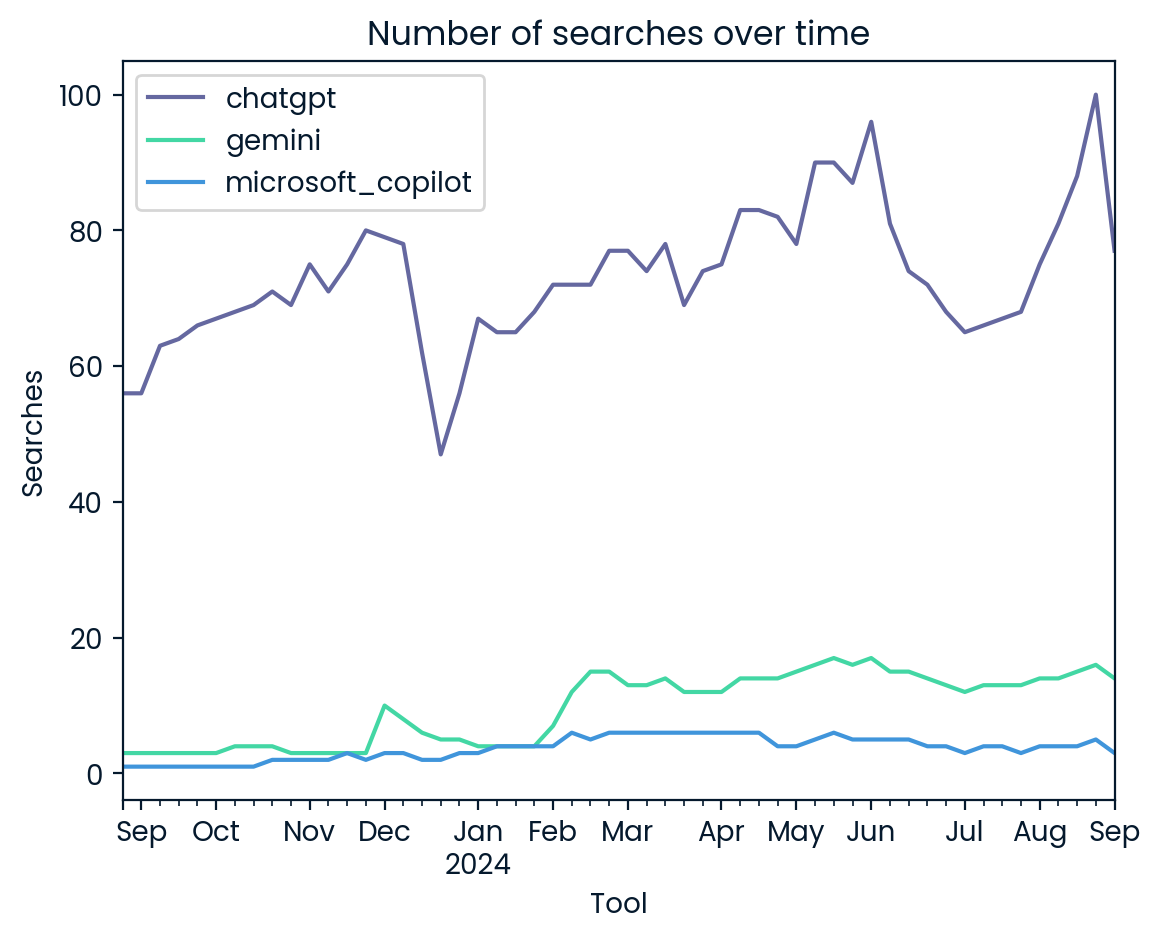

In [95]:
trends.plot(title='Number of searches over time', xlabel='Tool', ylabel='Searches')

In [96]:
gpt_dip = growth.idxmin()['chatgpt']
print(gpt_dip)
gpt_dip = str(gpt_dip.month_name()) + ' ' + str(gpt_dip.year)
print(gpt_dip)

2023-12-24 00:00:00
December 2023


In [97]:
monthly = trends.resample(rule='M').mean()
print(monthly.head())

            chatgpt  gemini  microsoft_copilot
week                                          
2023-08-31    56.00     3.0               1.00
2023-09-30    62.25     3.0               1.00
2023-10-31    68.80     3.6               1.40
2023-11-30    75.25     3.0               2.25
2023-12-31    64.40     6.8               2.60


In [98]:
best_month = monthly.sum(axis=1).idxmax().month_name()
print(f"The best month is {best_month}.")

The best month is May.
